In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
#Import libraries
from config import weather_api_key
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

In [4]:
#create a set of random latitude and longitude combinations
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

In [5]:
#Add the latitudes and longitudes to a list
coordinates=list(lats_lngs)

In [6]:
#Create empty city list
cities=[]
#Iterate through the list of coordinates
for coordinate in coordinates:
    #Identify the nearest city to the coordinate
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    #Check if the city is not in the list
    if city not in cities:
        #add city to the list
        cities.append(city)
#Check cities length
len(cities)

579

In [7]:
#Starting URL
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key
#Query url
city_url=url+"&q="+"Boston"

In [8]:
#Get the API reponse
weather_response=requests.get(city_url)
#Pass it to JSON
weather_json=weather_response.json()
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 32.36,
  'feels_like': 28.49,
  'temp_min': 28.74,
  'temp_max': 35.56,
  'pressure': 1035,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 121, 'gust': 8.99},
 'clouds': {'all': 100},
 'dt': 1643748769,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643716673,
  'sunset': 1643752661},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging
print("Beginning Data Retrieval    ")
print(".......................................")

#Create counters
record_count=1
set_count=1

#Loop through all the cities in the list
for i,city in enumerate(cities):
    
    #Group cities in sets of 50
    if (i%50==0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    #Create the end point URL
    city_url=url+"&q="+city.replace(" ","+")
    
    #Log the URL, record and set number and the city to the terminal
    print(f"Proccesing Record{record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count+=1
    
    try:
        #Parse the JSON and retrieve data.
        city_weather=requests.get(city_url).json()
        #Parse the requested data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the data to the city_data list
        city_data.append({"City":city.title(),
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
        
    #If an error is experienced skip the city
    except:
        print("City not found. Skipping...")
        pass
#Indicate that Data loading is complete
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval    
.......................................
Proccesing Record1 of Set 1 | goiatuba
Proccesing Record2 of Set 1 | arlit
Proccesing Record3 of Set 1 | lagoa
Proccesing Record4 of Set 1 | provideniya
Proccesing Record5 of Set 1 | jamestown
Proccesing Record6 of Set 1 | stamsund
City not found. Skipping...
Proccesing Record7 of Set 1 | chimbote
Proccesing Record8 of Set 1 | avarua
Proccesing Record9 of Set 1 | arraial do cabo
Proccesing Record10 of Set 1 | minsk
Proccesing Record11 of Set 1 | salinas
Proccesing Record12 of Set 1 | angul
Proccesing Record13 of Set 1 | hilo
Proccesing Record14 of Set 1 | havelock
Proccesing Record15 of Set 1 | rikitea
Proccesing Record16 of Set 1 | bilibino
Proccesing Record17 of Set 1 | port hardy
Proccesing Record18 of Set 1 | sao joao da barra
Proccesing Record19 of Set 1 | puerto ayora
Proccesing Record20 of Set 1 | port alfred
Proccesing Record21 of Set 1 | busselton
Proccesing Record22 of Set 1 | huajuapan
City not found. Skipp

Proccesing Record41 of Set 4 | kruisfontein
Proccesing Record42 of Set 4 | bundaberg
Proccesing Record43 of Set 4 | avera
Proccesing Record44 of Set 4 | teguise
Proccesing Record45 of Set 4 | necochea
Proccesing Record46 of Set 4 | xiangdong
City not found. Skipping...
Proccesing Record47 of Set 4 | hualmay
Proccesing Record48 of Set 4 | yuzha
Proccesing Record49 of Set 4 | pokhara
Proccesing Record50 of Set 4 | kalmunai
Proccesing Record1 of Set 5 | codrington
Proccesing Record2 of Set 5 | asau
Proccesing Record3 of Set 5 | cidreira
Proccesing Record4 of Set 5 | lalupon
Proccesing Record5 of Set 5 | ust-omchug
Proccesing Record6 of Set 5 | buariki
City not found. Skipping...
Proccesing Record7 of Set 5 | yeletskiy
City not found. Skipping...
Proccesing Record8 of Set 5 | huarmey
Proccesing Record9 of Set 5 | rio grande
Proccesing Record10 of Set 5 | shingu
Proccesing Record11 of Set 5 | torbay
Proccesing Record12 of Set 5 | nosy varika
Proccesing Record13 of Set 5 | maunabo
Proccesing

Proccesing Record31 of Set 8 | moron
Proccesing Record32 of Set 8 | lodja
Proccesing Record33 of Set 8 | quatre cocos
Proccesing Record34 of Set 8 | mahajanga
Proccesing Record35 of Set 8 | zhicheng
Proccesing Record36 of Set 8 | mercedes
Proccesing Record37 of Set 8 | kuhdasht
Proccesing Record38 of Set 8 | tarko-sale
Proccesing Record39 of Set 8 | odienne
Proccesing Record40 of Set 8 | assiniboia
Proccesing Record41 of Set 8 | northam
Proccesing Record42 of Set 8 | tomatlan
Proccesing Record43 of Set 8 | bandundu
Proccesing Record44 of Set 8 | beatrice
Proccesing Record45 of Set 8 | balkanabat
Proccesing Record46 of Set 8 | ribeira grande
Proccesing Record47 of Set 8 | venado tuerto
Proccesing Record48 of Set 8 | iberia
Proccesing Record49 of Set 8 | cockburn town
Proccesing Record50 of Set 8 | puerto del rosario
Proccesing Record1 of Set 9 | grindavik
Proccesing Record2 of Set 9 | houston
Proccesing Record3 of Set 9 | zhigansk
Proccesing Record4 of Set 9 | matamoros
Proccesing Recor

Proccesing Record24 of Set 12 | babushkin
Proccesing Record25 of Set 12 | belyy
Proccesing Record26 of Set 12 | khvoynaya
Proccesing Record27 of Set 12 | kuytun
Proccesing Record28 of Set 12 | parauna
Proccesing Record29 of Set 12 | fairbanks
----------------------------
Data Retrieval Complete
----------------------------


In [13]:
#Convert the array of dictionaries to a Pandas DF
city_data_df=pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
515,Charters Towers,-20.1000,146.2667,78.55,75,100,6.26,AU,2022-02-01 21:12:15
516,Wanaka,-44.7000,169.1500,65.19,90,100,8.77,NZ,2022-02-01 21:12:15
517,Sao Miguel Do Araguaia,-13.2750,-50.1628,78.94,86,35,3.11,BR,2022-02-01 21:12:16
518,Moba,33.2288,105.0179,21.45,82,99,5.06,CN,2022-02-01 21:12:16
519,Babushkin,51.7122,105.8647,9.00,96,99,7.72,RU,2022-02-01 21:12:17
520,Belyy,55.8402,32.9419,19.31,94,100,7.70,RU,2022-02-01 21:12:17
521,Khvoynaya,58.9000,34.5333,11.57,99,100,2.98,RU,2022-02-01 21:12:17
522,Kuytun,54.3419,101.5036,-11.92,99,91,0.92,RU,2022-02-01 21:12:18
523,Parauna,-16.9478,-50.4486,72.14,91,100,6.26,BR,2022-02-01 21:12:18
524,Fairbanks,64.8378,-147.7164,-4.40,74,20,0.00,US,2022-02-01 21:10:32


In [15]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [18]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [5]:
#Import the csv file
weather_data_path="weather_data/cities.csv"
city_data_df=pd.read_csv(weather_data_path)
city_data_df.tail(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
515,515,Charters Towers,AU,2022-02-01 21:12:15,-20.1000,146.2667,78.55,75,100,6.26
516,516,Wanaka,NZ,2022-02-01 21:12:15,-44.7000,169.1500,65.19,90,100,8.77
517,517,Sao Miguel Do Araguaia,BR,2022-02-01 21:12:16,-13.2750,-50.1628,78.94,86,35,3.11
518,518,Moba,CN,2022-02-01 21:12:16,33.2288,105.0179,21.45,82,99,5.06
519,519,Babushkin,RU,2022-02-01 21:12:17,51.7122,105.8647,9.00,96,99,7.72
520,520,Belyy,RU,2022-02-01 21:12:17,55.8402,32.9419,19.31,94,100,7.70
521,521,Khvoynaya,RU,2022-02-01 21:12:17,58.9000,34.5333,11.57,99,100,2.98
522,522,Kuytun,RU,2022-02-01 21:12:18,54.3419,101.5036,-11.92,99,91,0.92
523,523,Parauna,BR,2022-02-01 21:12:18,-16.9478,-50.4486,72.14,91,100,6.26
524,524,Fairbanks,US,2022-02-01 21:10:32,64.8378,-147.7164,-4.40,74,20,0.00


In [5]:
#Assign the variable series
lats=weather_data_df["Lat"]
max_temps=weather_data_df["Max Temp"]
humidity=weather_data_df["Humidity"]
cloudiness=weather_data_df["Cloudiness"]
wind=weather_data_df["Wind Speed"]

In [6]:
#Impor the time module
import time
#Get the day in seconds
today=time.strftime("%x")

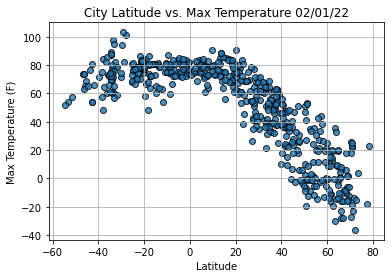

In [7]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

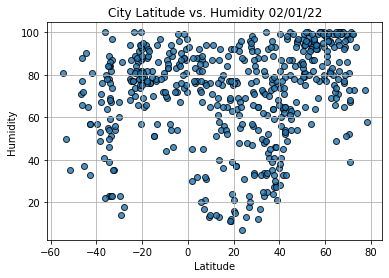

In [8]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

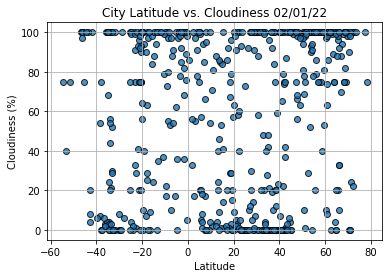

In [9]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

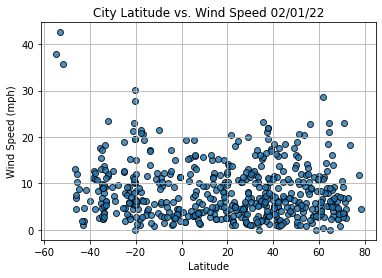

In [10]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression 
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    #Calculate the "y_values" from the slope and intersept
    regress_values=x_values*slope+intercept
    #Get the equiation of the line
    line_eq="y= "+str(round(slope,2))+"x +"+str(round(intercept,2))
    #Creat a scatter plot and regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Anotate the graph
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [6]:
#Create northen and souther hemispheres city df
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

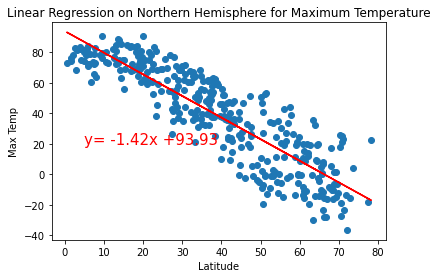

-0.879590749473161


In [17]:
#Linear regresion on the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],
                      "Linear Regression on Northern Hemisphere for Maximum Temperature","Max Temp",(5,20))

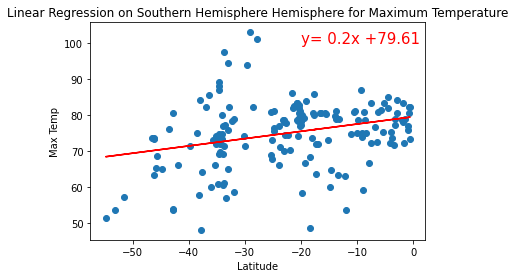

0.2876423454988595


In [18]:
#Linear regresion on the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],
                      "Linear Regression on Southern Hemisphere Hemisphere for Maximum Temperature","Max Temp",(-20,100))

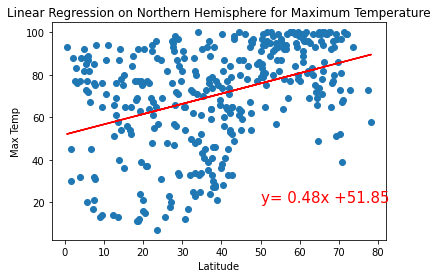

0.3895019509732594


In [20]:
#Linear regresion on the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],
                      "Linear Regression on Northern Hemisphere for Maximum Temperature","Max Temp",(50,20))

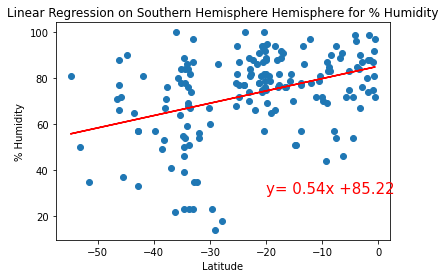

0.37900067151464223


In [22]:
#Linear regresion on the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],
                      "Linear Regression on Southern Hemisphere Hemisphere for % Humidity","% Humidity",(-20,30))

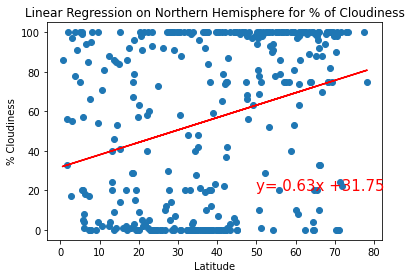

0.2935982590098587


In [26]:
#Linear regresion on the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],
                      "Linear Regression on Northern Hemisphere for % of Cloudiness","% Cloudiness",(50,20))

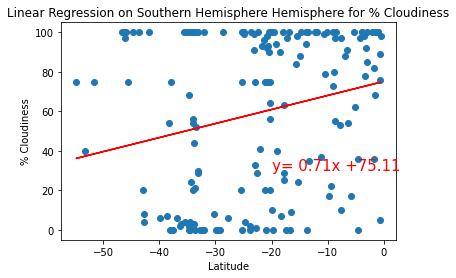

0.23137373119856802


In [27]:
#Linear regresion on the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],
                      "Linear Regression on Southern Hemisphere Hemisphere for % Cloudiness","% Cloudiness",(-20,30))

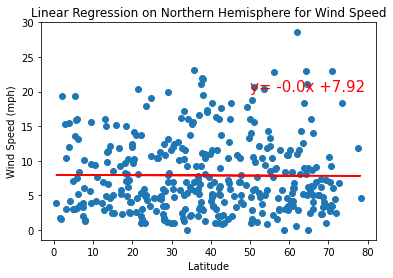

-0.004304398293772552


In [28]:
#Linear regresion on the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],
                      "Linear Regression on Northern Hemisphere for Wind Speed","Wind Speed (mph)",(50,20))

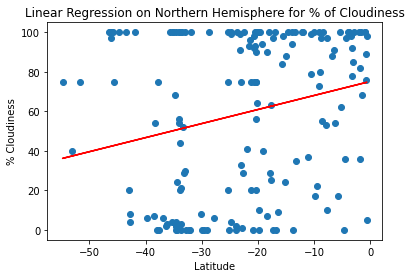

0.23137373119856802


In [30]:
#Linear regresion on the Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],
                      "Linear Regression on Northern Hemisphere for % of Cloudiness","% Cloudiness",(50,20))